# Phyiscs Problems - Lectures 18 & 19 - Homework 9 

FALL 2023


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [8]:
G = 6.67e-11
M = 5.97e24
R = 6371e3
Pi = 3.14159265

T = float(input("Enter T value in seconds"))

h = (((G*M*T**2) / (4 * Pi**2))**(1/3)) - R 

print ("The satellite is shown to be", (h), "meters above the surface")

Enter T value in seconds50000
The satellite is shown to be 22953243.200237844 meters above the surface


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [15]:
G = 6.67e-11
M = 5.97e24
R = 6371e3
Pi = 3.14159265

T1 = 24*3600
h1 = (((G*M*T1**2) / (4 * Pi**2))**(1/3)) - R 

T2 = 90*60
h2 =(((G*M*T2**2) / (4 * Pi**2))**(1/3)) - R 

T3 = 45*60
h3 = (((G*M*T3**2) / (4 * Pi**2))**(1/3)) - R 

print ("The satellite is shown to be", (h1), "meters above the surface after one day ")
print ("The satellite is shown to be", (h2), "meters above the surface after 90 mins ")
print ("The satellite is shown to be", (h3), "meters above the surface after 45 mins")

The satellite is shown to be 35855910.20834249 meters above the surface after one day 
The satellite is shown to be 279321.63043892663 meters above the surface after 90 mins 
The satellite is shown to be -2181559.894619401 meters above the surface after 45 mins


In [14]:
G = 6.67e-11
M = 5.97e24
R = 6371e3
Pi = 3.14159265

Periods = [24*3600, 90*60, 45*60]

for T in Periods:
    h = (((G*M*T**2) / (4 * Pi**2))**(1/3)) - R 

    print ("The satellite is shown to be", (h), "meters above the surface")

The satellite is shown to be 35855910.20834249 meters above the surface
The satellite is shown to be 279321.63043892663 meters above the surface
The satellite is shown to be -2181559.894619401 meters above the surface


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [18]:
print ("Earth has two axis in which it rotates around, it rotates around the suns axis and rotates around its own axis.")
print ( "The rotational axis causes the sun to make a full rotation be longer than what is takes the earth to make one full rotation")
print ()

G = 6.67e-11
M = 5.97e24
R = 6371e3
Pi = 3.14159265

T1 = 24*3600
h1 = (((G*M*T1**2) / (4 * Pi**2))**(1/3)) - R 

T2 = 23.93*3600
h2 =(((G*M*T2**2) / (4 * Pi**2))**(1/3)) - R 

difference = h1 - h2

print ("The satellite is shown to be", (h1), "meters above the surface after 24 hours ")
print ("The satellite is shown to be", (h2), "meters above the surface after 23.94 hours ")

print ("The difference between the two altitudes is", (difference),"meters")

Earth has two axis in which it rotates around, it rotates around the suns axis and rotates around its own axis.
The rotational axis causes the sun to make a full rotation be longer than what is takes the earth to make one full rotation

The satellite is shown to be 35855910.20834249 meters above the surface after 24 hours 
The satellite is shown to be 35773762.362000585 meters above the surface after 23.94 hours 
The difference between the two altitudes is 82147.84634190798 meters


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

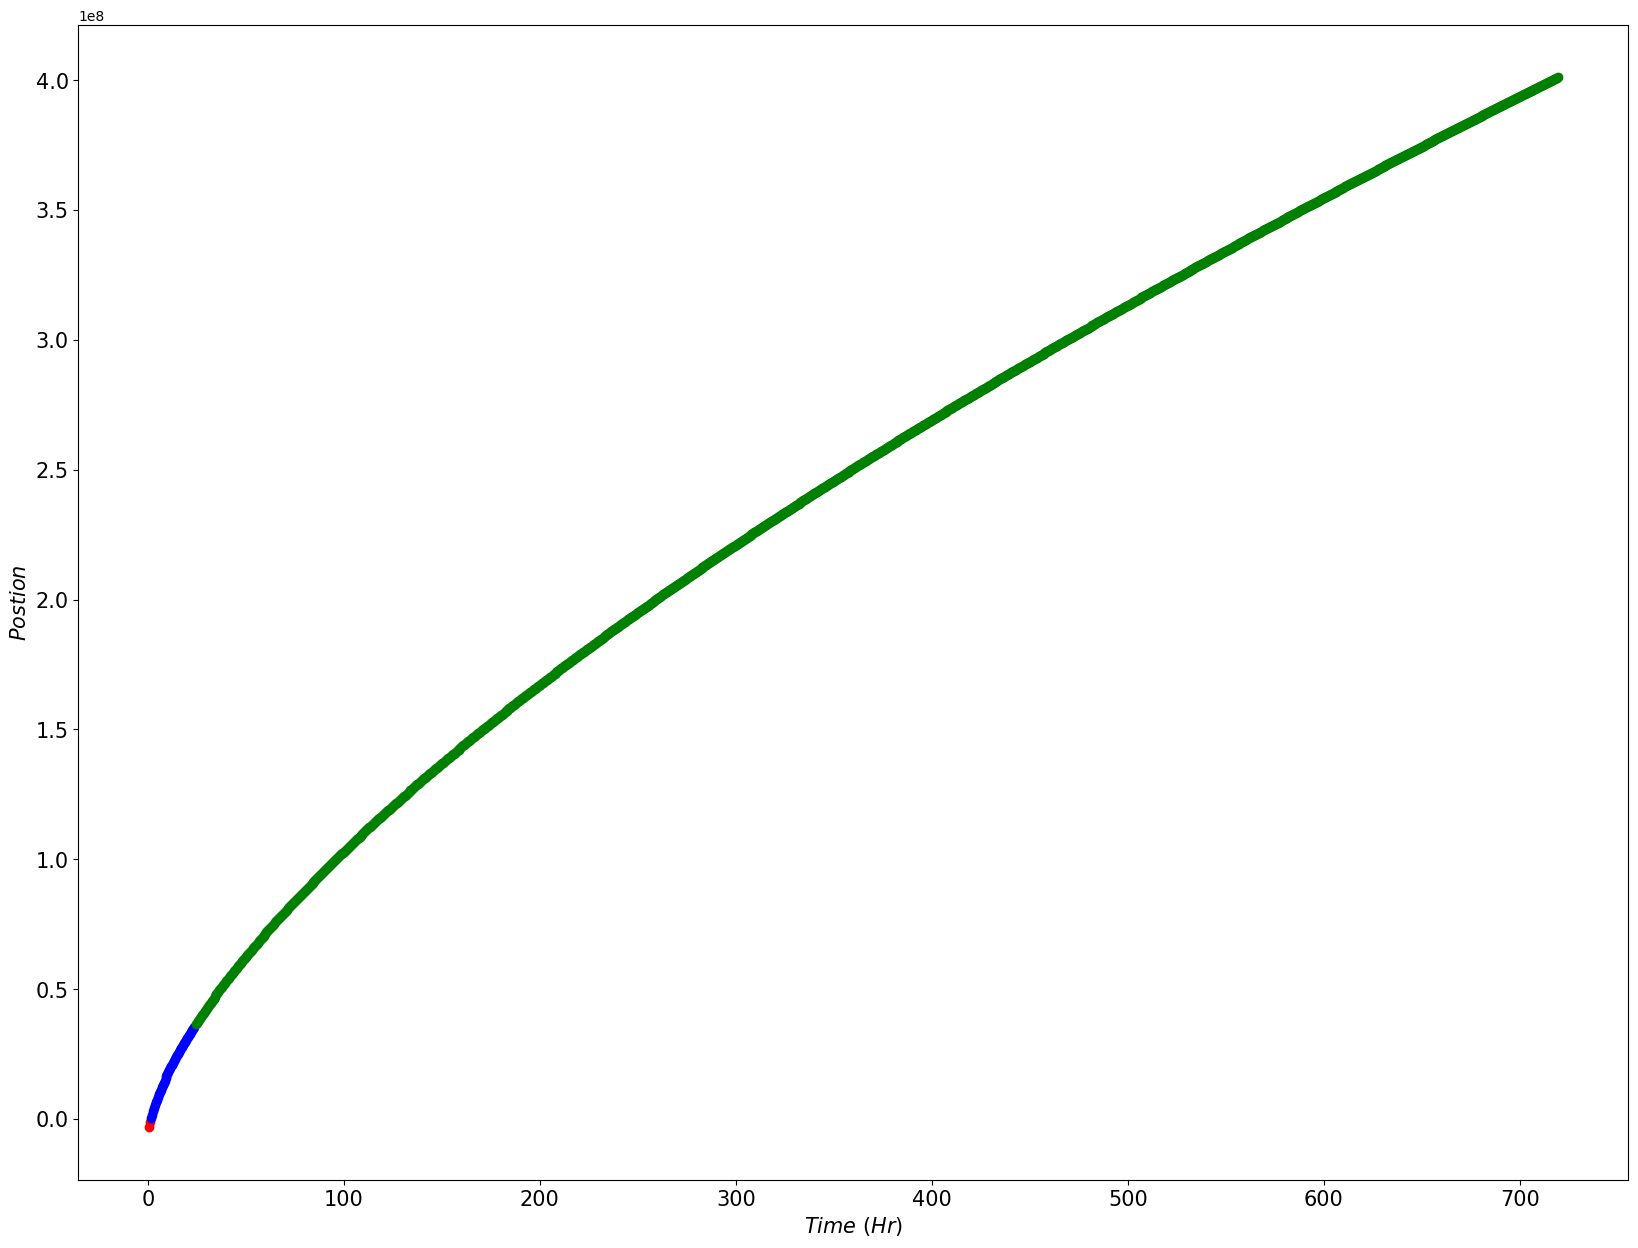

In [43]:
import numpy as np 
from matplotlib import pyplot as plt

G = 6.67e-11
M = 5.97e24
R = 6371e3
Pi = 3.14159265

h_red = []
t_red = []

h_blue = []
t_blue = []

h_green = []
t_green = []

def height(T):
    return (((G*M*(T*60*60)**2) / (4 * Pi**2))**(1/3)) - R 

for T in np.arange (0.5, 720, 0.5):
    if height(T) < 0:
        t_red.append(T)
        h_red.append(height(T))
    if height(T) > 0 and height(T) < 35855910.20834249:
        t_blue.append(T)
        h_blue.append(height(T))
    if height(T) > 35855910.20834249:
        t_green.append(T)
        h_green.append(height(T))
  
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(t_red, h_red, c = 'r')
ax.scatter(t_blue, h_blue, c = 'b')
ax.scatter(t_green, h_green, c = 'g') 
ax.set_xlabel("$Time$ $(Hr)$",size=15) 
ax.set_ylabel("$Postion$",size=15) 
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [6]:
import math 

x_light = float(input("Enter value of x in light years"))
v_light = float(input("Enter value of v as a fraction of the speed of light"))

c =299792458
gamma = math.sqrt(1- (v_light**2))


t_earth = x_light/v_light

t_ship = (1/gamma)*((t_earth)- ((v_light*x_light)))

print()
print("Time in the rest frame of the observer is", t_earth, "years")
print ("Time perceived by the passenger on board the ship is", t_ship, "years")

Enter value of x in light years10
Enter value of v as a fraction of the speed of light.99

Time in the rest frame of the observer is 10.1010101010101 years
Time perceived by the passenger on board the ship is 1.424922826228869 years


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [11]:
import math 

x_light = 10 
v_light = [0.90, 0.98, 0.999]

c =299792458

for v in v_light: 

    gamma = math.sqrt(1- (v**2))

    t_earth = x_light/v

    t_ship = (1/gamma)*((t_earth)- ((v*x_light)))

    print()
    print("Time in the rest frame of the observer is", t_earth, "years")
    print ("Time perceived by the passenger on board the ship is", t_ship, "years")


Time in the rest frame of the observer is 11.11111111111111 years
Time perceived by the passenger on board the ship is 4.843221048378526 years

Time in the rest frame of the observer is 10.204081632653061 years
Time perceived by the passenger on board the ship is 2.0305866063400337 years

Time in the rest frame of the observer is 10.01001001001001 years
Time perceived by the passenger on board the ship is 0.4475493274496109 years


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [16]:
import math 

a= 0.001
b= 1000
c= 0.001

sqrt = (math.sqrt ((b**2)- (4*a*c)))

pos_quad_eq = (-b + sqrt) / (2*a)

neg_quad_eq = (-b - sqrt) / (2*a)

print ("Answers are", pos_quad_eq, "and", neg_quad_eq)

Answers are -9.999894245993346e-07 and -999999.999999


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [23]:
import math 

a= 0.001
b= 1000
c= 0.001

sqrt = (math.sqrt ((b**2)- (4*a*c)))

pos_quad_eq = (2*c) / (-b-sqrt)

neg_quad_eq = (2*c) / (-b+sqrt)

print ("It seems to show that one answer increases while the other number decreases when doing it this way")
print ()
print ("Answers are", pos_quad_eq, "and", neg_quad_eq)

It seems to show that one answer increases while the other number decreases when doing it this way

Answers are -1.000000000001e-06 and -1000010.5755125057


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

In [21]:
import math 

a= 0.001
b= 1000
c= 0.001

sqrt = (math.sqrt ((b**2)- (4*a*c)))

pos_quad_eq = (2*c) / (-b-sqrt)

neg_quad_eq = (-b - sqrt) / (2*a)

print ("Answers are", pos_quad_eq, "and", neg_quad_eq)

Answers are -1.000000000001e-06 and -999999.999999


### 4) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.




In [ ]:
import math 

l1 = float(input("Enter the distance to the sun"))
v1 = float(input("Enter the velocity at perihelion"))
G = 6.67e-11
M = 1.9891e30
C = -((v1**2)-((2*G*M)/l1))
B = -((2*G*M)/(v1*l1))
a = 1

v2_pos = ((-B + math.sqrt(B**2-(4*a*C)))/(2*a))
v2_neg = ((-B - math.sqrt(B**2-(4*a*C)))/(2*a))
if v2_pos < v2_neg:
    v2 = v2_pos
    l2 = l1 * v1 / v2
else:
    v2 = v2_neg
    l2 = l1 * v1 / v2

a = (l1 + l2) * (1/2)
  
b = math.sqrt(l1 * l2)

T = (2 * math.pi * a *b) / (l1*v1)

e = (l2 - l1) / (l2 + l1)

print ("L2 value is", l2)
print ("v2 value is", v2)
print ("a value is", a)
print ("b value is", b)
print ("T value is", T)
print ("e value is", e)


#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

In [6]:
import math 

l1 = 1.47e11
v1 = 3.0287e4
G = 6.67e-11
M = 1.9891e30
C = -((v1**2)-((2*G*M)/l1))
B = -((2*G*M)/(v1*l1))
a = 1

v2_pos = ((-B + math.sqrt(B**2-(4*a*C)))/(2*a))
v2_neg = ((-B - math.sqrt(B**2-(4*a*C)))/(2*a))
if v2_pos < v2_neg:
    v2 = v2_pos
    l2 = l1 * v1 / v2
else:
    v2 = v2_neg
    l2 = l1 * v1 / v2

a = (l1 + l2) * (1/2)
  
b = math.sqrt(l1 * l2)

   
T = (2 * math.pi * a *b) / (l1*v1)

   
e = (l2 - l1) / (l2 + l1)

print ("L2 value is", l2)
print ("v2 value is", v2)
print ("a value is", a)
print ("b value is", b)
print ("T value is", T)
print ("e value is", e)


L2 value is 151889719689.2628
v2 value is 29311.983780787297
a value is 149444859844.6314
b value is 149424860027.77994
T value is 31514477.84540148
e value is 0.016359611479265082


In [7]:
import math 

l1 = 8.7830e10
v1 = 5.4529e4
G = 6.67e-11
M = 1.9891e30
C = -((v1**2)-((2*G*M)/l1))
B = -((2*G*M)/(v1*l1))
a = 1

v2_pos = ((-B + math.sqrt(B**2-(4*a*C)))/(2*a))
v2_neg = ((-B - math.sqrt(B**2-(4*a*C)))/(2*a))
if v2_pos < v2_neg:
    v2 = v2_pos
    l2 = l1 * v1 / v2
else:
    v2 = v2_neg
    l2 = l1 * v1 / v2

a = (l1 + l2) * (1/2)
  
b = math.sqrt(l1 * l2)

   
T = (2 * math.pi * a *b) / (l1*v1)

   
e = (l2 - l1) / (l2 + l1)

print ("L2 value is", l2)
print ("v2 value is", v2)
print ("a value is", a)
print ("b value is", b)
print ("T value is", T)
print ("e value is", e)



L2 value is 5472738862158.555
v2 value is 875.1161330052964
a value is 2780284431079.2773
b value is 693304157108.1093
T value is 2528846591.482919
e value is 0.9684097069284723
